<a href="https://colab.research.google.com/github/rodespdi/PDA2526/blob/main/vtk_deformaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización 3D con VTK/PyVista en Google Colab
Este cuaderno genera una figura 3D (cruz extruida), aplica **cuatro deformaciones geométricas** (torsión, tapering, bending y shear) y muestra los resultados en Google Colab usando **renderizado off-screen**.

Incluye:
- Instalación de dependencias.
- Generación de la figura original.
- Aplicación de deformaciones.
- Visualización en PNG y exportación a HTML interactivo.


In [ ]:
!pip install vtk pyvista ipyvtklink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pyvista as pv
from IPython.display import Image, display

# Configuración para PyVista en Colab
pv.set_jupyter_backend('none')  # Desactiva backend interactivo


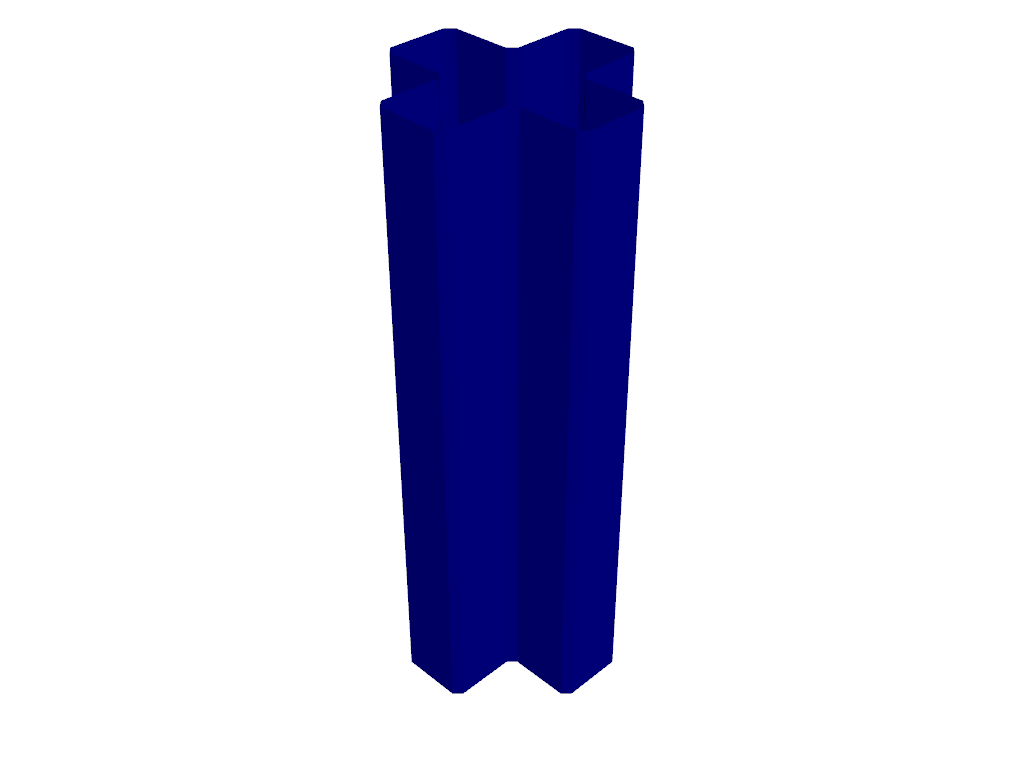

In [ ]:
# Crear volumen binario (cruz extruida)
step_xy, step_z = 0.2, 0.5
x_range = np.arange(-2, 2 + step_xy, step_xy)
y_range = np.arange(-2, 2 + step_xy, step_xy)
z_range = np.arange(-10, 10 + step_z, step_z)

X, Y, Z = np.meshgrid(x_range, y_range, z_range, indexing='ij')
V_shape = ((np.abs(X) <= 1.5) & (np.abs(Y) <= 0.5)) | ((np.abs(X) <= 0.5) & (np.abs(Y) <= 1.5))

# Convertir a PyVista
volume = pv.wrap(V_shape.astype(np.uint8))
mesh = volume.contour([0.5])  # Extraer superficie

# Mostrar figura original
plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(mesh, color='blue')
plotter.show(screenshot='original.png')
display(Image('original.png'))


## Deformación 1: Torsión

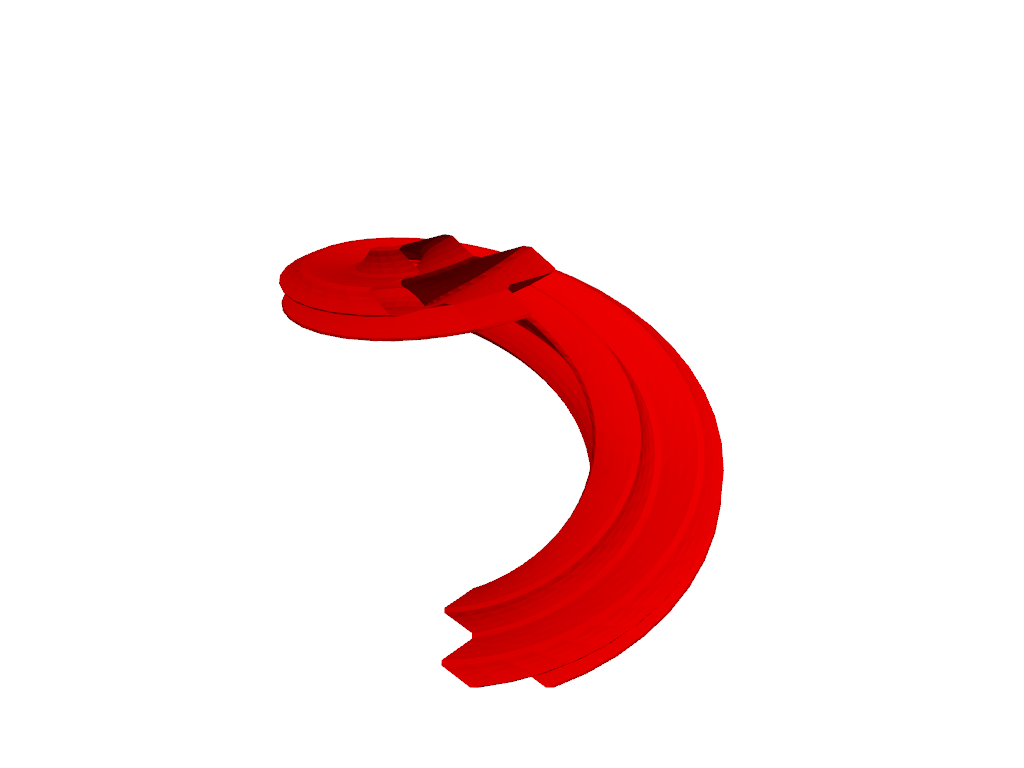

In [ ]:
twist_factor = 0.15
points = mesh.points.copy()
z = points[:, 2]
theta = twist_factor * z
x_new = points[:, 0] * np.cos(theta) - points[:, 1] * np.sin(theta)
y_new = points[:, 0] * np.sin(theta) + points[:, 1] * np.cos(theta)
points[:, 0], points[:, 1] = x_new, y_new
mesh_twist = pv.PolyData(points, mesh.faces)

plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(mesh_twist, color='red')
plotter.show(screenshot='torsion.png')
display(Image('torsion.png'))


## Deformación 2: Afilado (Tapering)

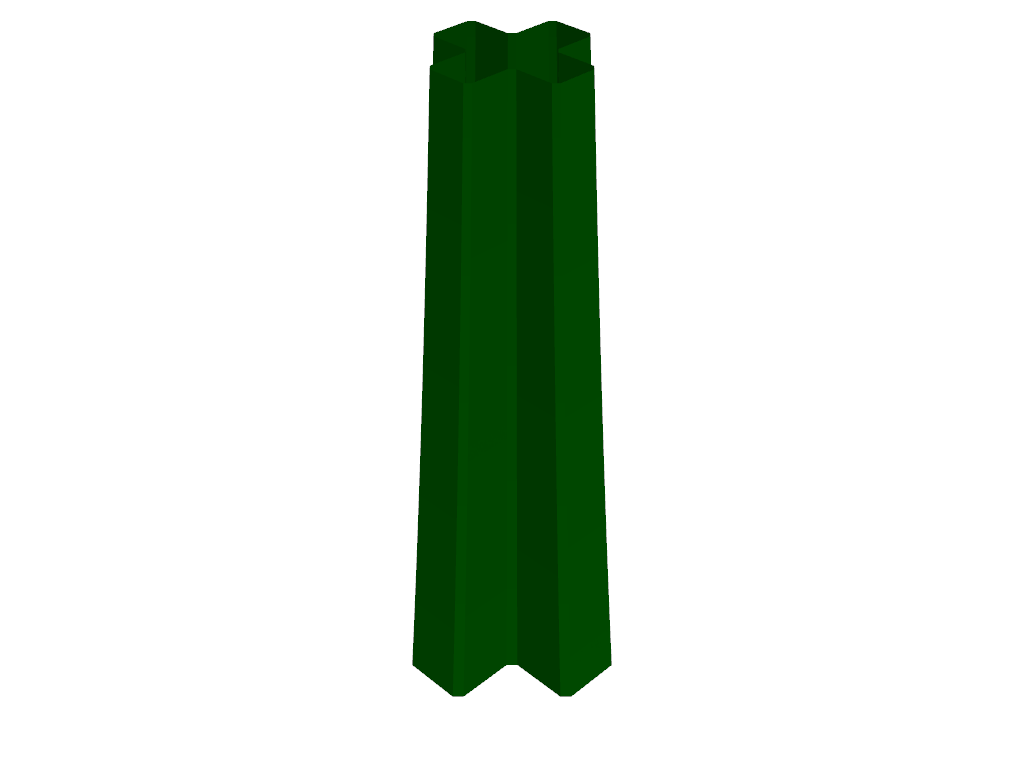

In [ ]:
taper_factor = 0.4
points = mesh.points.copy()
z = points[:, 2]
max_z = np.max(np.abs(z)) or 1
scale = np.exp(-taper_factor * np.abs(z / max_z))
points[:, 0] *= scale
points[:, 1] *= scale
mesh_taper = pv.PolyData(points, mesh.faces)

plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(mesh_taper, color='green')
plotter.show(screenshot='tapering.png')
display(Image('tapering.png'))


## Deformación 3: Flexión (Bending)

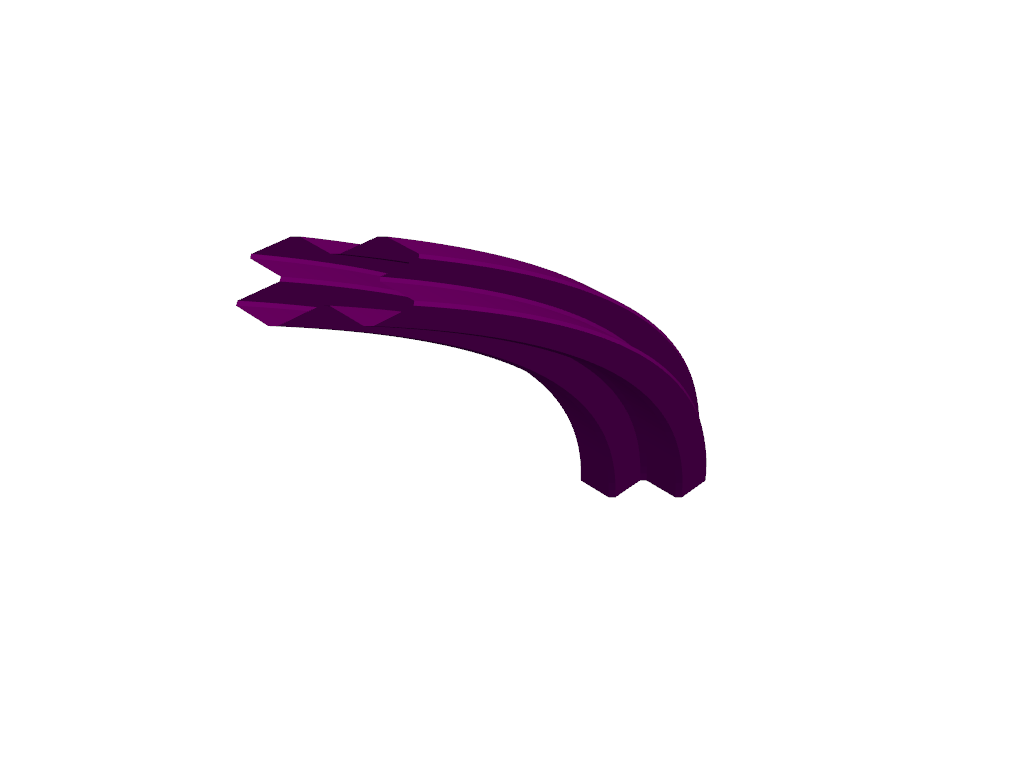

In [ ]:
bend_factor = 0.025
points = mesh.points.copy()
points[:, 0] += bend_factor * (points[:, 2] ** 2)
mesh_bend = pv.PolyData(points, mesh.faces)

plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(mesh_bend, color='purple')
plotter.show(screenshot='bending.png')
display(Image('bending.png'))


## Deformación 4: Cizallamiento (Shear)

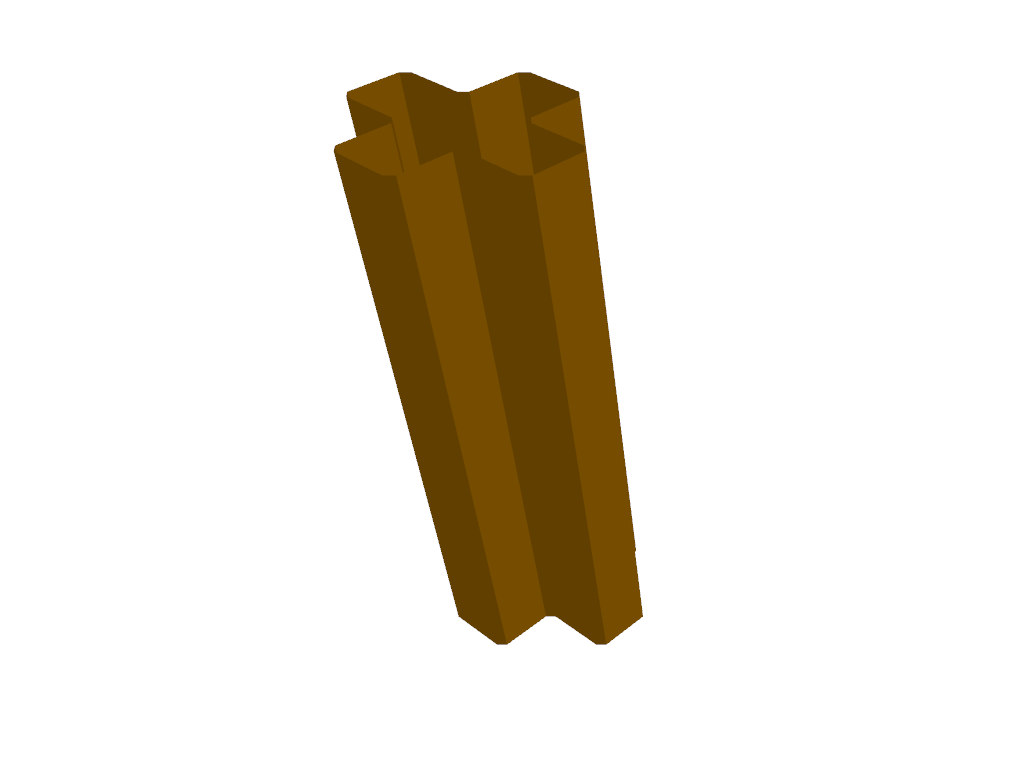

In [ ]:
shear_factor = 0.2
points = mesh.points.copy()
points[:, 0] += shear_factor * points[:, 2]
mesh_shear = pv.PolyData(points, mesh.faces)

plotter = pv.Plotter(off_screen=True)
plotter.add_mesh(mesh_shear, color='orange')
plotter.show(screenshot='shear.png')
display(Image('shear.png'))


## Exportación a HTML interactivo

In [ ]:
!pip install "pyvista[jupyter]"
# Exportar la última deformación (shear) a HTML interactivo
plotter = pv.Plotter()
plotter.add_mesh(mesh_shear, color='orange')
plotter.export_html('shear.html')
print('Archivo HTML generado: shear.html')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.8/780.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 46.6 MB/s eta 0:00:00
Archivo HTML generado: shear.html
